<a href="https://colab.research.google.com/github/DaasDaham/MIDASLearningAssignments/blob/master/MIDASWeek2SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([0, 1, 2]), array([50, 50, 50]))


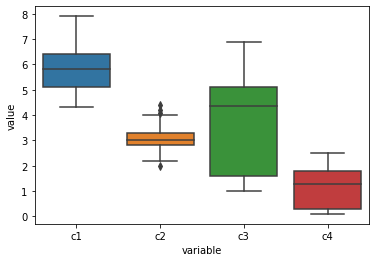

In [2]:
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']
Y = iris['target']
df = pd.DataFrame(data=X, columns=["c1", "c2", "c3", "c4"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
print(np.unique(Y,return_counts=True))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,Y, shuffle=True)
model = SVC()
hyper_params = [{'kernel':['rbf'],'gamma':[0.0001,0.001,0.01,0.1,1,10],'C': [0.01,0.1,1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [0.01,0.1,1, 10, 100, 1000]}, {'kernel':['poly'],'C':[0.01,0.1,1, 10, 100, 1000], 'degree':[2,3,4,5,6,7]}]
clf = GridSearchCV(model, hyper_params)
clf.fit(iris.data, iris.target)
print(clf.best_params_)

{'C': 0.1, 'degree': 3, 'kernel': 'poly'}


In [4]:
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("F1 Score",f1_score(y_test,y_pred,average=None))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Accuracy 1.0
F1 Score [1. 1. 1.]
Confusion Matrix
 [[17  0  0]
 [ 0 11  0]
 [ 0  0 10]]
